# **Importing libraries**

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline
from wordcloud import WordCloud
import seaborn as sns
sns.set_theme(style="white", palette=None)
sns.set(rc={'figure.figsize':(7,5)})
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip3 install basemap
from mpl_toolkits.basemap import Basemap
from sqlite3 import connect
conn = connect(':memory:')
c=conn.cursor()

# **Importing dataset**

In [ ]:
# add google drive
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/capstone_project/' 

Mounted at /content/gdrive


In [ ]:
# load all data as pandas DataFrame
customers = pd.read_csv('/content/gdrive/My Drive/capstone_project/olist_customers_dataset.csv')
sellers = pd.read_csv('/content/gdrive/My Drive/capstone_project/olist_sellers_dataset.csv')
reviews = pd.read_csv('/content/gdrive/My Drive/capstone_project/olist_order_reviews_dataset.csv')
order_items = pd.read_csv('/content/gdrive/My Drive/capstone_project/olist_order_items_dataset.csv')
products = pd.read_csv('/content/gdrive/My Drive/capstone_project/olist_products_dataset.csv')
geolocation = pd.read_csv('/content/gdrive/My Drive/capstone_project/olist_geolocation_dataset.csv')
category_name_tr = pd.read_csv('/content/gdrive/My Drive/capstone_project/product_category_name_translation.csv')
orders = pd.read_csv('/content/gdrive/My Drive/capstone_project/olist_orders_dataset.csv')
order_payments = pd.read_csv('/content/gdrive/My Drive/capstone_project/olist_order_payments_dataset.csv')
# write the data to a sqlite table
customers.to_sql('customers', conn)
sellers.to_sql('sellers', conn)
reviews.to_sql('reviews', conn)
order_items.to_sql('order_items', conn)
products.to_sql('products', conn)
geolocation.to_sql('geolocation', conn)
category_name_tr.to_sql('category_name_tr', conn)
orders.to_sql('orders', conn)
order_payments.to_sql('order_payments', conn)

# **Identification of data types**


In [ ]:
print(customers.dtypes)
print(sellers.dtypes)
print(reviews.dtypes)
print(order_items.dtypes)
print(products.dtypes)
print(geolocation.dtypes)
print(category_name_tr.dtypes)
print(orders.dtypes)
print(order_payments.dtypes)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            

In [ ]:
# convert some columns which includes date, to datetime object
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

In [ ]:
# replace the product categorie names to english
products = products.merge(category_name_tr, on='product_category_name', how='left')
products.drop ('product_category_name', axis=1, inplace=True)

# **Data preprocessing & visualizations**

In [ ]:
# check if there any null value in tables
print(customers.isnull().sum())
print(sellers.isnull().sum())
print(reviews.isnull().sum())
print(order_items.isnull().sum())
print(products.isnull().sum())
print(geolocation.isnull().sum())
print(category_name_tr.isnull().sum())
print(orders.isnull().sum())
print(order_payments.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
product_id                         0
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm     

In [ ]:
# Collections for each dataset
datasets = [customers, geolocation, orders, order_items, order_payments,
         reviews, products, sellers, category_name_tr]
names = ['customers', 'geolocation', 'orders', 'items', 'payments',
         'reviews', 'products', 'sellers','category']

# Creating a DataFrame with useful information about all datasets
data_info = pd.DataFrame({})
data_info['dataset'] = names
data_info['n_rows'] = [df.shape[0] for df in datasets]
data_info['n_cols'] = [df.shape[1] for df in datasets]
data_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
data_info['qty_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_info['null_columns'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

data_info.style.background_gradient()

,dataset,n_rows,n_cols,null_amount,qty_null_columns,null_columns
0,customers,99441,5,0,0,
1,geolocation,1000163,5,0,0,
2,orders,99441,8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
3,items,112650,7,0,0,
4,payments,103886,5,0,0,
5,reviews,99224,7,145903,2,"review_comment_title, review_comment_message"
6,products,32951,9,2461,8,"product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, product_category_name_english"
7,sellers,3095,4,0,0,
8,category,71,2,0,0,


## customers table

In [ ]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# drop customer zip code prefix column
customers.drop(['customer_zip_code_prefix'], axis=1, inplace=True)

In [ ]:
customers.shape

(99441, 4)

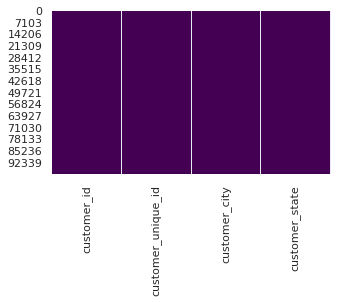

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(customers.isnull(),cbar=False,cmap='viridis')
# no null

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
 3   customer_state      99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [ ]:
customers.duplicated().sum()
# no duplicated value

0

In [ ]:
# number of unique values in customer_id column
customers.customer_id.nunique()

99441

In [ ]:
# number of unique values in customer_unique_id column
customers.customer_unique_id.nunique()

96096

In [ ]:
# unique city names on customer data
customers.customer_city.unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [ ]:
customers.customer_city.nunique()
# There are total 4119 different cities from where customers visit

4119

In [ ]:
# unique city names on customer data
customers.customer_state.unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [ ]:
customers.customer_state.nunique()
# There are total 27 different states

27

In [ ]:
# value counts of customer each state (first 10 row)
customers['customer_state'].value_counts()[:10]

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: customer_state, dtype: int64

In [ ]:
# sum of customer state value counts
customers['customer_state'].value_counts().sum()

99441

In [ ]:
# percentage of SP 
(41746*100)/99441
# ~42% of customers are from SP state

41.980671956235355

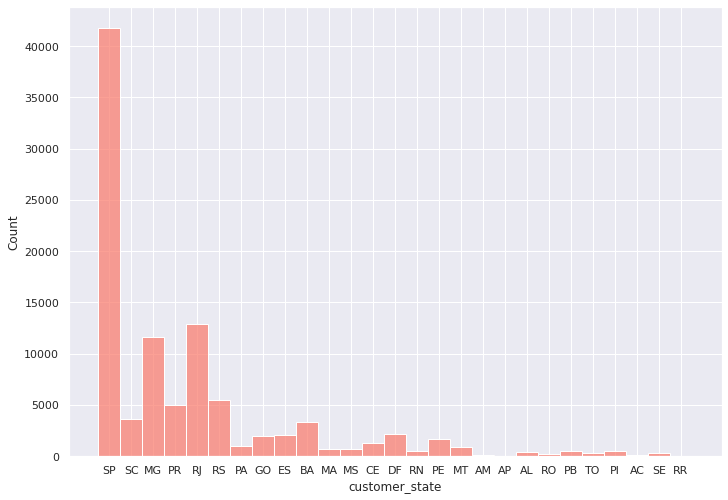

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(x=customers['customer_state'], data=customers, color='salmon')
plt.show()

# From above histogram, we can see that most numbers of customer are from SP (Sao Paul) state,followed by Rj (Rio de Janeiro) state.

In [ ]:
c_state_df = customers.groupby('customer_state').count()['customer_id'].reset_index().sort_values(by=['customer_id'], ascending=False)

In [ ]:
c_state_df[:10]

,customer_state,customer_id
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045
23,SC,3637
4,BA,3380
6,DF,2140
7,ES,2033
8,GO,2020


In [ ]:
conn.execute('''CREATE VIEW cust_state
AS SELECT customer_state AS "State", COUNT (DISTINCT customer_id) AS "Count"
FROM customers
GROUP BY customer_state''')

In [ ]:
pd.read_sql('''SELECT * FROM cust_state
ORDER BY Count DESC''', conn)[:10]

,State,Count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


Text(0, 0.5, 'State')

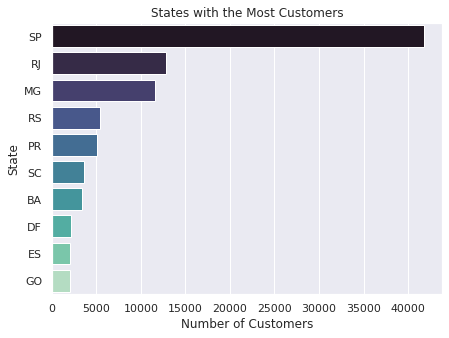

In [ ]:
# customer states which have most customers
splot=sns.barplot(data = c_state_df.sort_values('customer_id', ascending = False).nlargest(10,'customer_id'), x = 'customer_id', 
           y = 'customer_state', palette='mako')

plt.title('States with the Most Customers')
plt.xlabel('Number of Customers')
plt.ylabel('State')

In [ ]:
c_city_df = customers.groupby('customer_city').count()['customer_id'].reset_index().sort_values(by=['customer_id'], ascending=False)

In [ ]:
c_city_df[:10]

,customer_city,customer_id
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521
707,campinas,1444
2964,porto alegre,1379
3247,salvador,1245
1529,guarulhos,1189
3428,sao bernardo do campo,938


In [ ]:
customers['customer_city'].value_counts().sum()

99441

In [ ]:
# percentage of sao paulo
(15540*100)/99441

15.627356925211934

In [ ]:
# percentage of top 10
((15540+6882+2773+2131+1521+1444+1379+1245+1189+938)*100)/99441

35.23898593135628

In [ ]:
conn.execute('''CREATE VIEW cust_city
AS SELECT customer_city AS "City", COUNT (DISTINCT customer_id) AS "Count"
FROM customers
GROUP BY customer_city''')

In [ ]:
pd.read_sql('''SELECT * FROM cust_city
ORDER BY Count DESC''', conn)[:10]

,City,Count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


Text(0, 0.5, 'City')

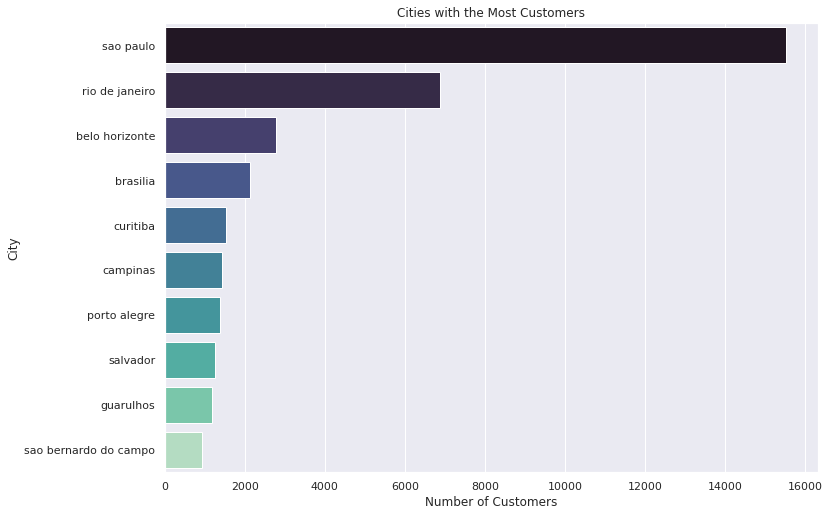

In [ ]:
# customer states which have most customers
splot=sns.barplot(data = c_city_df.sort_values('customer_id', ascending = False).nlargest(10,'customer_id'), x = 'customer_id', 
           y = 'customer_city', palette='mako')

plt.title('Cities with the Most Customers')
plt.xlabel('Number of Customers')
plt.ylabel('City')

## sellers table

In [ ]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
# drop seller_zip_code_prefix column
sellers.drop(['seller_zip_code_prefix'], axis=1, inplace=True)

In [ ]:
sellers.shape

(3095, 3)

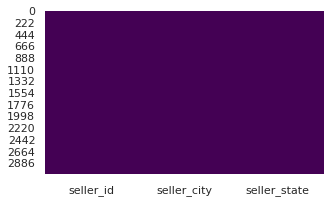

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(sellers.isnull(),cbar=False,cmap='viridis')

In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   seller_id     3095 non-null   object
 1   seller_city   3095 non-null   object
 2   seller_state  3095 non-null   object
dtypes: object(3)
memory usage: 72.7+ KB


In [ ]:
sellers.duplicated().sum()

0

In [ ]:
# number of unique seller_id values
sellers.seller_id.nunique()

3095

In [ ]:
# number of unique seller_city values
sellers.seller_city.nunique()

611

In [ ]:
# number of unique seller_id values
sellers.seller_state.nunique()

23

In [ ]:
s_city_df = sellers.groupby('seller_city').count()['seller_id'].reset_index().sort_values(by=['seller_id'], ascending=False)

In [ ]:
s_city_df

,seller_city,seller_id
517,sao paulo,694
159,curitiba,127
450,rio de janeiro,96
64,belo horizonte,68
442,ribeirao preto,52
...,...,...
264,ivoti,1
262,itirapina,1
260,itau de minas,1
257,itapui,1


In [ ]:
conn.execute('''CREATE VIEW seller_city
AS SELECT seller_city AS "City", COUNT (DISTINCT seller_id) AS "Count"
FROM sellers
GROUP BY seller_city''')

In [ ]:
pd.read_sql('''SELECT * FROM seller_city
ORDER BY Count DESC''', conn)[:10]

,City,Count
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
5,guarulhos,50
6,ibitinga,49
7,santo andre,45
8,campinas,41
9,maringa,40


Text(0, 0.5, 'City')

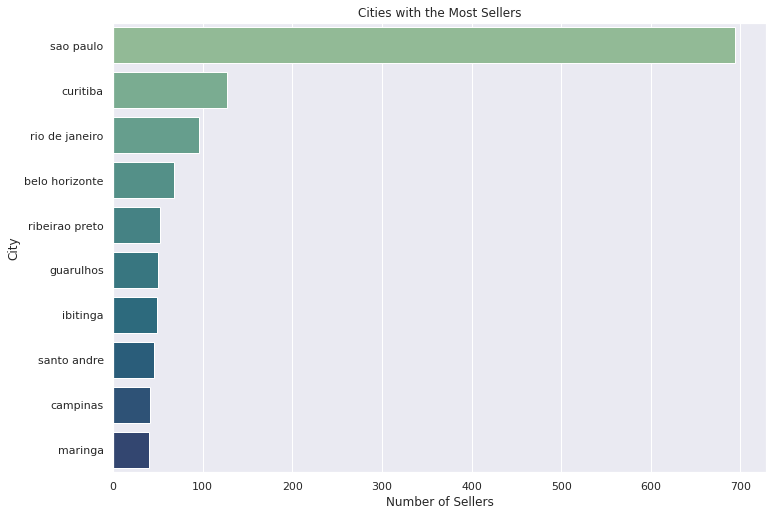

In [ ]:
splot=sns.barplot(data = s_city_df.sort_values('seller_id', ascending = False).nlargest(10,'seller_id'), x = 'seller_id', 
           y = 'seller_city', palette='crest')
plt.title('Cities with the Most Sellers')
plt.xlabel('Number of Sellers')
plt.ylabel('City')

In [ ]:
s_state_df = sellers.groupby('seller_state').count()['seller_id'].reset_index().sort_values(by=['seller_id'], ascending=False)

In [ ]:
s_state_df[:10]

,seller_state,seller_id
22,SP,1849
15,PR,349
8,MG,244
20,SC,190
16,RJ,171
19,RS,129
6,GO,40
4,DF,30
5,ES,23
2,BA,19


In [ ]:
conn.execute('''CREATE VIEW seller_state
AS SELECT seller_state AS "State", COUNT (DISTINCT seller_id) AS "Count"
FROM sellers
GROUP BY seller_state''')

In [ ]:
pd.read_sql('''SELECT * FROM seller_state
ORDER BY Count DESC''', conn)[:10]

,State,Count
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


Text(0, 0.5, 'State')

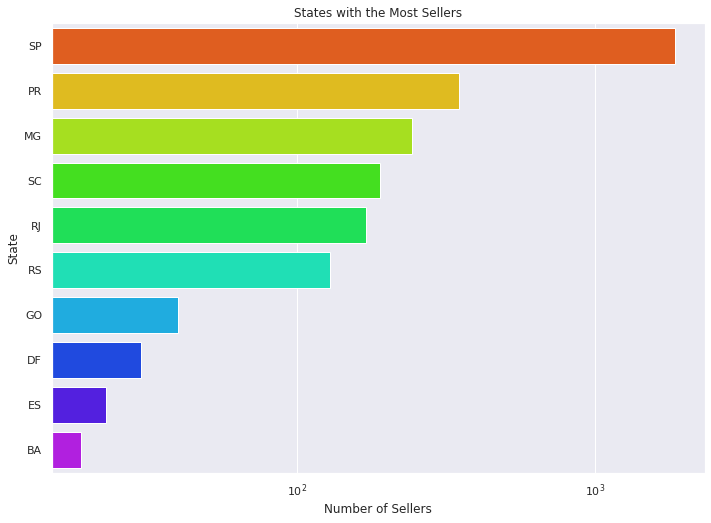

In [ ]:
# with log scale
splot=sns.barplot(data = s_state_df.sort_values('seller_id', ascending = False).nlargest(10,'seller_id'), x = 'seller_id', 
           y = 'seller_state', palette='gist_rainbow').set_xscale('log') 

plt.title('States with the Most Sellers')
plt.xlabel('Number of Sellers')
plt.ylabel('State')

Text(0, 0.5, 'State')

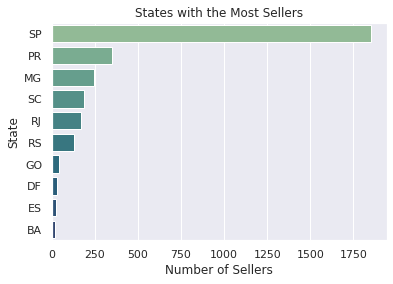

In [ ]:
plt.figure(figsize=(6,4))
splot=sns.barplot(data = s_state_df.sort_values('seller_id', ascending = False).nlargest(10,'seller_id'), x = 'seller_id', 
           y = 'seller_state', palette='crest')   

plt.title('States with the Most Sellers')
plt.xlabel('Number of Sellers')
plt.ylabel('State')

## reviews table

In [ ]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
# percentage of null values
print(reviews['review_comment_title'].isnull().sum() / len(reviews))

0.8834153027493349


In [ ]:
# number of null values 
reviews['review_comment_title'].isnull().sum()

87656

In [ ]:
reviews.drop(['review_comment_title'], axis=1, inplace=True)  

In [ ]:
reviews.shape

(99224, 6)

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_message   40977 non-null  object
 4   review_creation_date     99224 non-null  object
 5   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.5+ MB


In [ ]:
reviews.duplicated().sum()
# no duplicated value

0

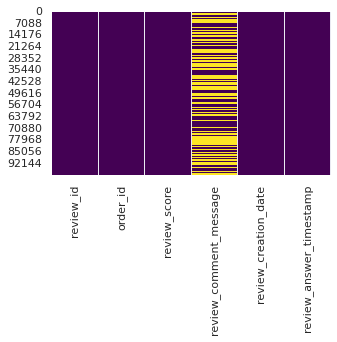

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(reviews.isnull(),cbar=False,cmap='viridis')

In [ ]:
reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
# Proportion of null values
print(reviews['review_comment_message'].isnull().sum() / len(reviews))

0.5870253164556962


In [ ]:
# merge orders and reviews tables 
order_review = orders.merge(reviews, on='order_id', how='outer')

In [ ]:
order_review[order_review['review_comment_message'].isna() & (order_review['order_status']=='delivered')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5.0,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,89b738e70a1ce346db29a20fb2910161,4.0,NaN,2017-07-27 00:00:00,2017-07-27 22:48:30
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,07d67dd06ed5f88bef11ef6b464e79ae,5.0,NaN,2017-05-27 00:00:00,2017-05-28 02:59:57
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,fc4af8aea8ec3f1a3cd181d3d0cadbd5,1.0,NaN,2017-02-03 00:00:00,2017-02-05 01:58:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,ebd75732b5804e934123d11ec1f11db0,5.0,NaN,2017-10-21 00:00:00,2017-10-23 14:48:40
99985,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17,e8995c053d3db2d9c07407efe7de52dd,5.0,NaN,2017-02-08 00:00:00,2017-02-11 12:37:36
99986,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,96e8f371a3983122b739944537e15525,5.0,NaN,2017-03-07 00:00:00,2017-03-11 15:42:41
99987,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,e262b3f92d1ce917aa412a9406cf61a6,5.0,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08


In [ ]:
# the ratio of those whose comment section is nan even though it was delivered to the total number of vacancies
(57908*100)/58247

99.41799577660652

In [ ]:
reviews['review_comment_message'] = reviews['review_comment_message'].fillna('No message.')

In [ ]:
reviews.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No message.,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No message.,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No message.,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


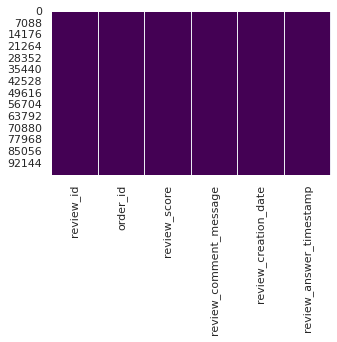

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(reviews.isnull(),cbar=False,cmap='viridis')

In [ ]:
reviews['review_score'].describe()

count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

In [ ]:
reviews['review_score'].value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

In [ ]:
percentage = reviews['review_score'].value_counts() / reviews['review_score'].value_counts().sum()
percentage

5    0.577763
4    0.192917
1    0.115133
3    0.082430
2    0.031756
Name: review_score, dtype: float64

Text(0, 0.5, 'Counts')

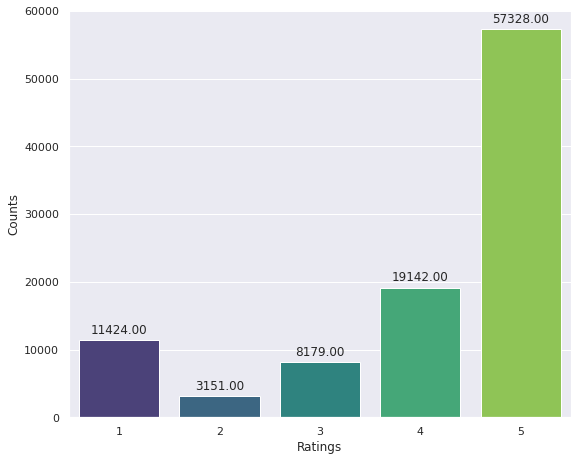

In [ ]:
plt.figure(figsize=(9,7.5))
plot_ = sns.barplot(x=reviews['review_score'].value_counts().index, y=reviews['review_score'].value_counts().values, palette='viridis')
for p in plot.patches:
  plot_.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel('Ratings')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

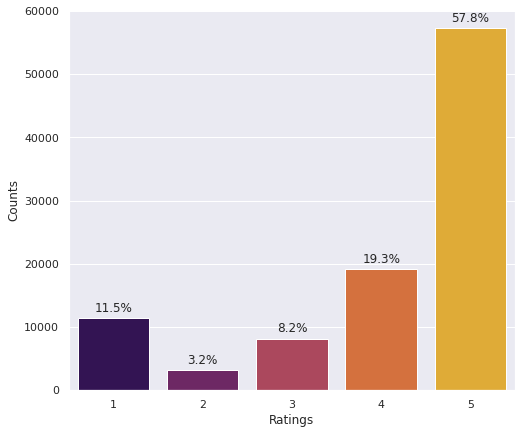

In [ ]:
plt.figure(figsize=(8,7))
total = float(len(reviews['review_score']))
ax = sns.barplot(x=reviews['review_score'].value_counts().index, y=reviews['review_score'].value_counts().values, palette='inferno')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel('Ratings')
plt.ylabel('Counts')

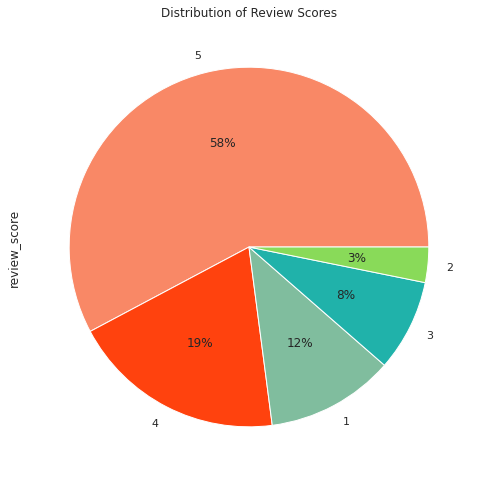

In [ ]:
# percentages of reviews
ax = percentage.plot(kind='pie', autopct='%1.0f%%',
                                colors = ['#f98866', '#ff420e', '#80bd9e', '#20b2aa', '#89da59'],
                                title='Distribution of Review Scores')

In [ ]:
# calculate the mean rating of all product categories
# we merge 3 df(s): review + order_item + product
rating_product= pd.merge(reviews, order_items[['order_id','product_id']]
         , on='order_id').merge(products[['product_id','product_category_name_english']], on='product_id')
rating_product['num review']= rating_product['review_comment_message'].notna().astype(int)
rating_product.head(2)

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,product_id,product_category_name_english,num review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No message.,2018-01-18 00:00:00,2018-01-18 21:46:59,fd25ab760bfbba13c198fa3b4f1a0cd3,sports_leisure,1
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No message.,2018-01-18 00:00:00,2018-01-18 21:46:59,fd25ab760bfbba13c198fa3b4f1a0cd3,sports_leisure,1


In [ ]:
rating_product.groupby(by='product_category_name_english').agg({'num review':['sum','mean']}).droplevel(0,axis=1)

,sum,mean
product_category_name_english,,
agro_industry_and_commerce,212,1.0
air_conditioning,292,1.0
art,207,1.0
arts_and_craftmanship,24,1.0
audio,361,1.0
...,...,...
stationery,2507,1.0
tablets_printing_image,81,1.0
telephony,4517,1.0


In [ ]:
# Number and percentage of review
review_product= rating_product.groupby(by='product_category_name_english').agg({'num review':['sum','mean']}).droplevel(0,axis=1)
review_product.rename(columns={'sum':'num review','mean':'% review'}, inplace=True)
# Average rating score
mean_rating_product= rating_product.groupby(by='product_category_name_english')['review_score'].mean()
mean_rating_product= pd.DataFrame(mean_rating_product).sort_values('review_score', ascending=False)
display(review_product.sort_values('num review', ascending=False).head(5), 
        review_product.sort_values('% review', ascending=False).head(5),
        mean_rating_product.head(5))

,num review,% review
product_category_name_english,,
bed_bath_table,11137,1.0
health_beauty,9645,1.0
sports_leisure,8640,1.0
furniture_decor,8331,1.0
computers_accessories,7849,1.0


,num review,% review
product_category_name_english,,
agro_industry_and_commerce,212,1.0
home_appliances_2,238,1.0
kitchen_dining_laundry_garden_furniture,280,1.0
industry_commerce_and_business,266,1.0
housewares,6943,1.0


,review_score
product_category_name_english,
cds_dvds_musicals,4.642857
fashion_childrens_clothes,4.500000
books_general_interest,4.446266
costruction_tools_tools,4.444444
flowers,4.419355


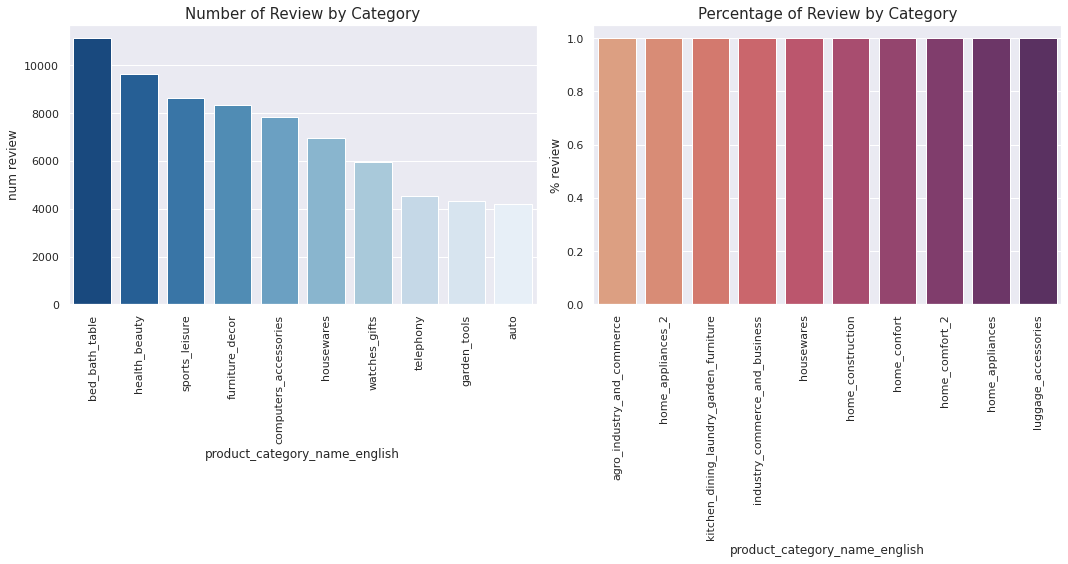

In [ ]:
# review numbers and percentages per first 10 category
fig, ax= plt.subplots(ncols=2, figsize=(15,8))
sns.barplot(x='product_category_name_english',y='num review', palette='Blues_r',
           data=review_product.reset_index().sort_values('num review', ascending=False).head(10), ax=ax[0])
sns.barplot(x='product_category_name_english',y='% review',palette="flare",
           data=review_product.reset_index().sort_values('% review', ascending=False).head(10), ax=ax[1])
ax[0].set_title('Number of Review by Category', fontsize=15)
ax[1].set_title('Percentage of Review by Category', fontsize=15)
ax[0].tick_params(axis='x', labelrotation=90)
ax[1].tick_params(axis='x', labelrotation=90)
fig.tight_layout();

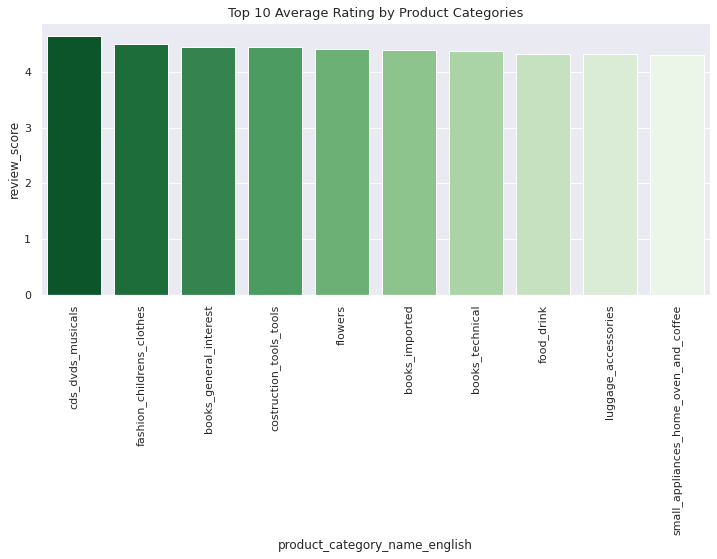

In [ ]:
# barplot of top 10 avg rating scores by product category
fig, ax= plt.subplots(figsize=(12,5))
sns.barplot(x='product_category_name_english',y='review_score', data=mean_rating_product.reset_index().head(10),
            palette='Greens_r',ax=ax)
ax.set_title('Top 10 Average Rating by Product Categories', fontsize=13)
plt.xticks(rotation = 90);

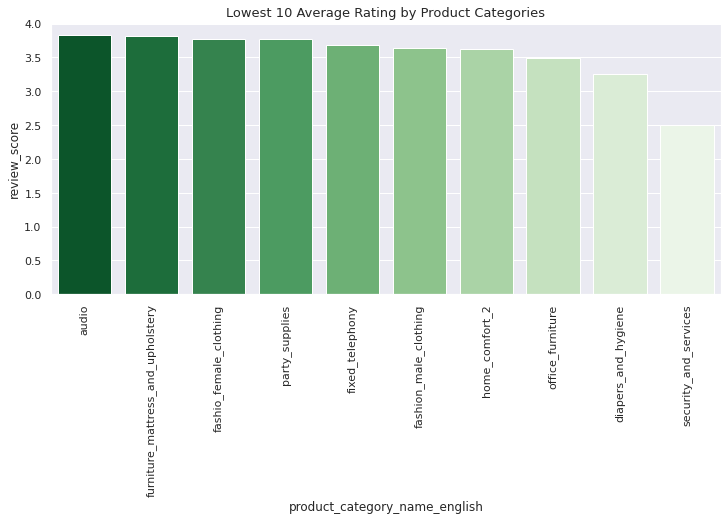

In [ ]:
# barplot of lowest 10 avg rating scores by product category
fig, ax= plt.subplots(figsize=(12,5))
sns.barplot(x='product_category_name_english',y='review_score', data=mean_rating_product.reset_index().tail(10),
            palette='Greens_r',ax=ax)
ax.set_title('Lowest 10 Average Rating by Product Categories', fontsize=13)
plt.xticks(rotation = 90);

## items table

In [ ]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# drop shipping_limit_date column from order_items table
order_items.drop('shipping_limit_date', axis=1, inplace=True)  

In [ ]:
# create a revenue column by multiplying the quantity and price values
order_items['revenue'] = order_items['order_item_id']*order_items['price']

In [ ]:
order_items.shape

(112650, 7)

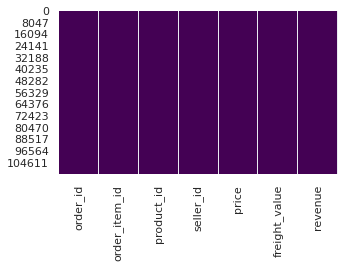

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(order_items.isnull(), cbar=False, cmap='viridis')

In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   seller_id      112650 non-null  object 
 4   price          112650 non-null  float64
 5   freight_value  112650 non-null  float64
 6   revenue        112650 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
order_items['order_item_id'].describe()

count    112650.000000
mean          1.197834
std           0.705124
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          21.000000
Name: order_item_id, dtype: float64

In [ ]:
order_items['revenue'].describe()

count    112650.000000
mean        136.686539
std         217.468683
min           0.850000
25%          45.000000
50%          84.495000
75%         149.900000
max       13440.000000
Name: revenue, dtype: float64

In [ ]:
order_items['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [ ]:
# top 10 columns which have most price value
order_items['price'].sort_values(ascending = False)[:10]

3556      6735.00
112233    6729.00
107841    6499.00
74336     4799.00
11249     4690.00
62086     4590.00
29193     4399.87
45843     4099.99
78310     4059.00
59137     3999.90
Name: price, dtype: float64

In [ ]:
order_items.price.median()

74.99

In [ ]:
order_items.price.mean()

120.65373901464716

In [ ]:
order_items['freight_value'].describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

In [ ]:
order_items.freight_value.median()

16.26

In [ ]:
order_items.duplicated().sum()

0

In [ ]:
order_items.order_item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [ ]:
order_qty = order_items.order_item_id.value_counts()
order_qty

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

In [ ]:
conn.execute('''CREATE VIEW or_quantity
AS SELECT order_item_id AS "Quantity", 
COUNT (*) AS "Frequency"
FROM order_items
GROUP BY order_item_id''')

In [ ]:
pd.read_sql('''SELECT * FROM or_quantity
ORDER BY Frequency DESC''', conn)[:10]

,Quantity,Frequency
0,1,98666
1,2,9803
2,3,2287
3,4,965
4,5,460
5,6,256
6,7,58
7,8,36
8,9,28
9,10,25


In [ ]:
order_items['price'].corr(order_items['freight_value'])

0.41420431036303473

In [ ]:
order_items['order_item_id'].corr(order_items['freight_value'])

-0.029379771981221058

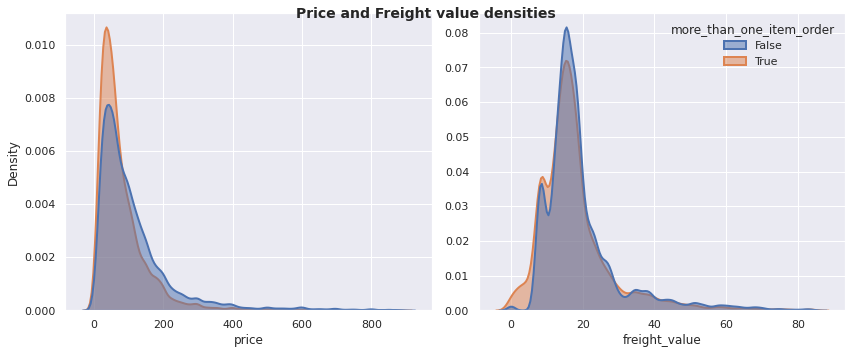

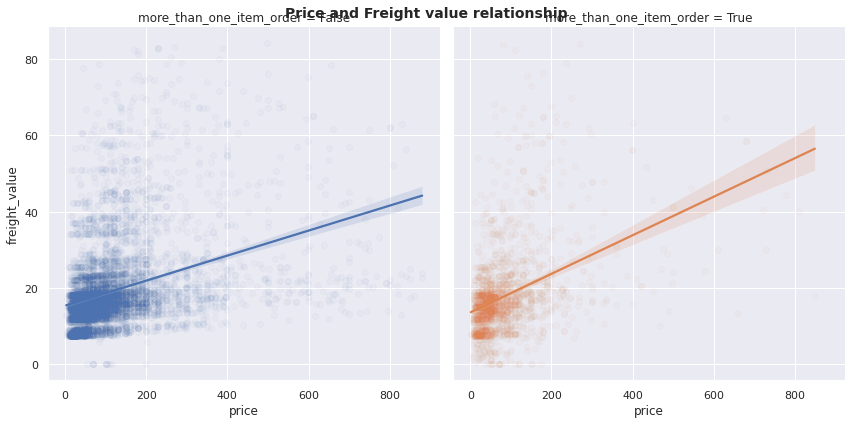

In [ ]:
# creating column to identify 'more_than_one_item_order'
order_items['more_than_one_item_order'] = order_items['order_id'].duplicated(keep=False)

# dropping everything above 99th percentile
numerics_to_plot = order_items[['price','freight_value']].copy()
cut = numerics_to_plot.quantile(.99)
numerics_to_plot = numerics_to_plot[numerics_to_plot < cut]
numerics_to_plot['more_than_one_item_order'] = order_items.loc[numerics_to_plot.index, 'more_than_one_item_order']

fig, axs = plt.subplots(1,2, figsize=(12,5))
sns.kdeplot(
   data=numerics_to_plot, x="price", cbar=True, hue='more_than_one_item_order',
   fill=True, common_norm=False,
   alpha=.5, linewidth=2, ax=axs[0], legend=False
)

sns.kdeplot(
   data=numerics_to_plot, x="freight_value", cbar=True, hue='more_than_one_item_order',
   fill=True, common_norm=False, ax=axs[1],
   alpha=.5, linewidth=2, 
)
axs[1].set_ylabel("")

fig.suptitle("Price and Freight value densities", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

sns.lmplot(
    data=numerics_to_plot.sample(10000), x="price", y="freight_value",
    hue="more_than_one_item_order", col="more_than_one_item_order", scatter_kws={'alpha':0.03}, height=6, aspect=1,
)
plt.suptitle("Price and Freight value relationship", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

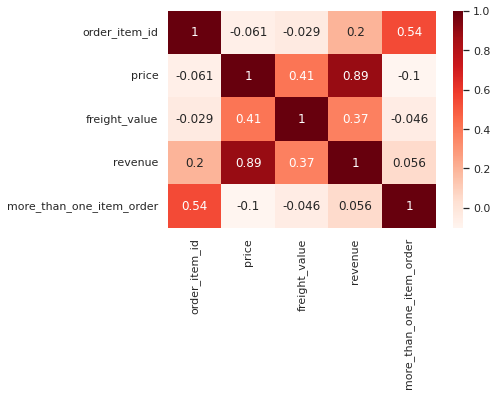

In [ ]:
plt.figure(figsize=(6,4))
c = order_items.corr()
sns.heatmap(c,cmap="Reds",annot=True)

In [ ]:
# item quantity in order
order_items['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

Text(0.5, 1.0, 'Counts of Items')

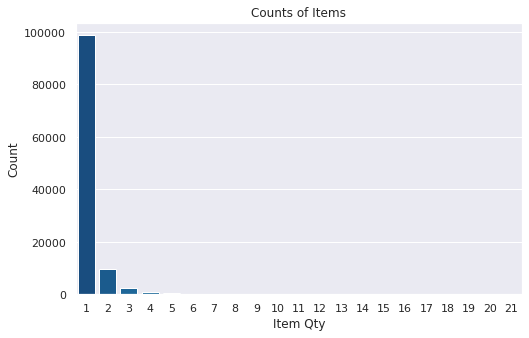

In [ ]:
plt.figure(figsize=(8,5))
plot = sns.barplot(x=order_items['order_item_id'].value_counts().index, y=order_items['order_item_id'].value_counts().values, palette='GnBu_r')
plt.xlabel('Item Qty')
plt.ylabel('Count')
plt.title('Counts of Items')

Text(0.5, 1.0, 'Counts of Items w/ log scale')

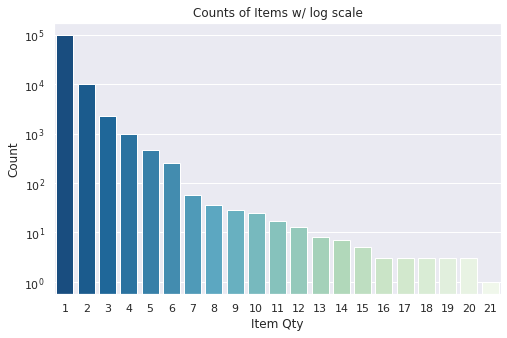

In [ ]:
# with log scale
plt.figure(figsize=(8,5))
plot = sns.barplot(x=order_items['order_item_id'].value_counts().index, y=order_items['order_item_id'].value_counts().values, palette='GnBu_r').set_yscale('log')
plt.xlabel('Item Qty')
plt.ylabel('Count')
plt.title('Counts of Items w/ log scale')

In [ ]:
order_items.duplicated().sum()
# no duplicated value

0

In [ ]:
order_items['product_id'].nunique() # number of unique product_ids

32951

In [ ]:
product_price_count = order_items.groupby('product_id')['price'].nunique().sort_values(ascending = False) # series containing the count of price points found for each product_id
product_price_count[:10]

product_id
437c05a395e9e47f9762e677a7068ce7    31
d285360f29ac7fd97640bf0baef03de0    29
e0d64dcfaa3b6db5c54ca298ae101d05    27
6f3b5b605d91b7439c5e3f5a8dffeea7    23
656e0eca68dcecf6a31b8ececfabe3e8    23
53b36df67ebb7c41585e8d54d6772e08    21
e53e557d5a159f5aa2c5e995dfdf244b    21
69455f41626a745aea9ee9164cb9eafd    21
4298b7e67dc399c200662b569563a2b2    20
461f43be3bdf8844e65b62d9ac2c7a5a    20
Name: price, dtype: int64

In [ ]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,revenue,more_than_one_item_order
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,58.90,False
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,239.90,False
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,199.00,False
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,12.99,False
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,199.90,False


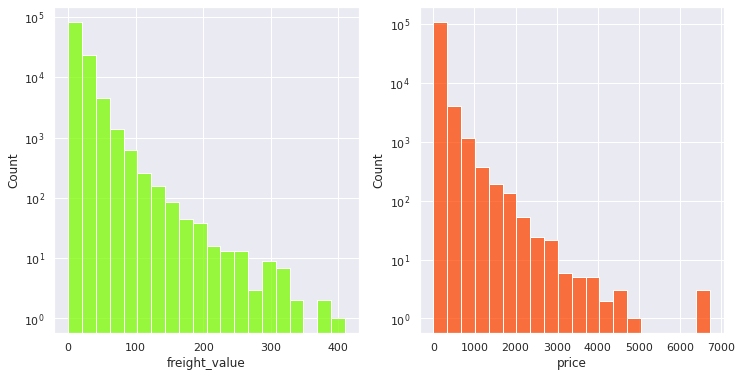

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=order_items, x="freight_value",  bins= 20, color="lawngreen", ax=axs[0]).set_yscale('log')   # mean=19.99
sns.histplot(data=order_items, x="price", bins= 20, color="orangered", ax=axs[1]).set_yscale('log')            # mean=120.653

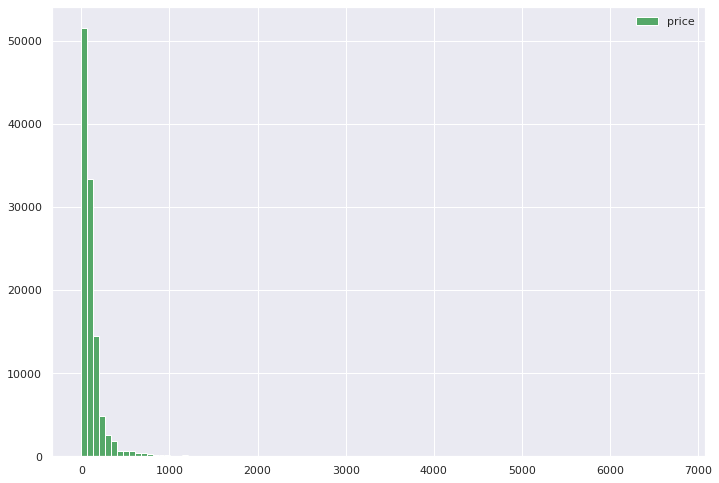

In [ ]:
# distribution of price on order_items data
plt.hist(order_items.price, bins=100, label='price', color='g')
plt.legend(loc='upper right')
plt.show()

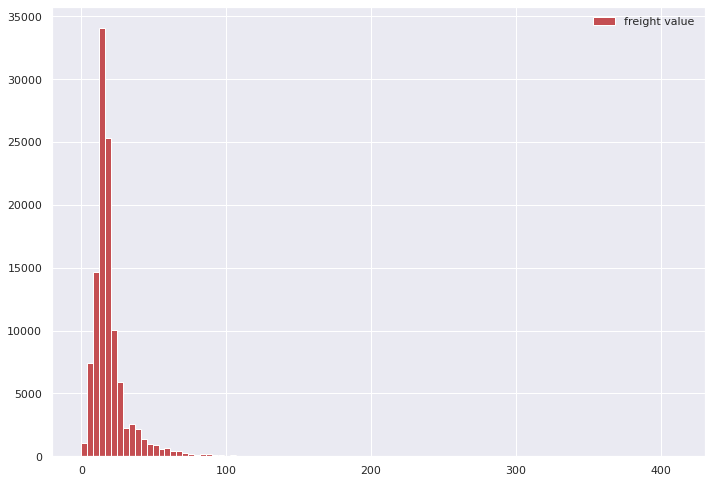

In [ ]:
# distribution of freight_value on order_items data
plt.hist(order_items.freight_value, bins=100, label='freight value', color='r')
plt.legend(loc='upper right')
plt.show()

## products table

In [ ]:
products.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [ ]:
products.shape

(32951, 9)

In [ ]:
products.isnull().sum()

product_id                         0
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

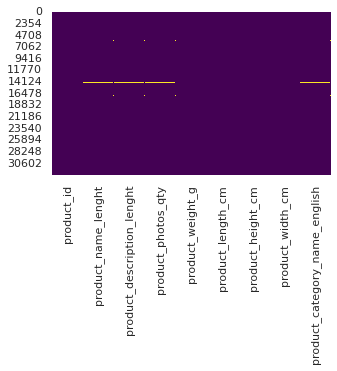

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(products.isnull(), cbar=False, cmap='viridis')

In [ ]:
products.isnull().sum().max()/products.shape[0]

0.01890686170374192

In [ ]:
products['product_weight_g'].corr(order_items['freight_value'])

0.0032212442799293157

In [ ]:
products.duplicated().sum()

0

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_name_lenght            32341 non-null  float64
 2   product_description_lenght     32341 non-null  float64
 3   product_photos_qty             32341 non-null  float64
 4   product_weight_g               32949 non-null  float64
 5   product_length_cm              32949 non-null  float64
 6   product_height_cm              32949 non-null  float64
 7   product_width_cm               32949 non-null  float64
 8   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(2)
memory usage: 3.5+ MB


In [ ]:
products['product_photos_qty'].describe()

count    32341.000000
mean         2.188986
std          1.736766
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         20.000000
Name: product_photos_qty, dtype: float64

Text(0, 0.5, 'Counts')

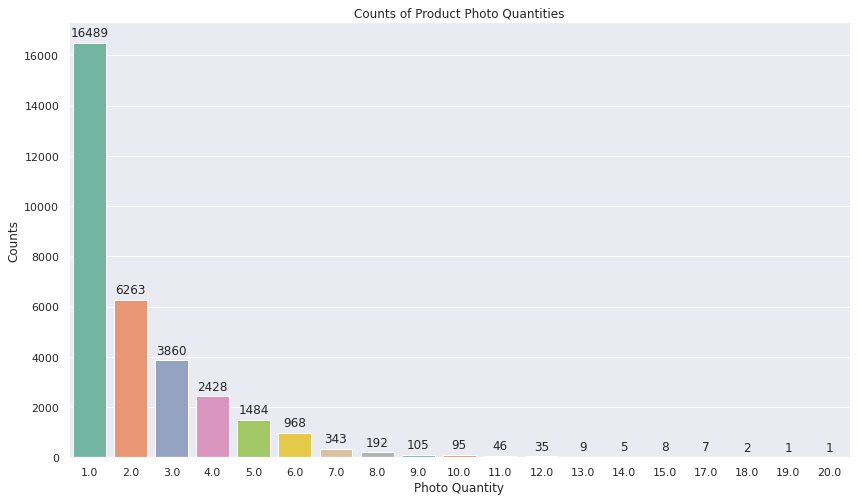

In [ ]:
# distribution of item quantity in one order
plt.figure(figsize=(14,8))
plot = sns.barplot(x=products['product_photos_qty'].value_counts().index, y=products['product_photos_qty'].value_counts().values, palette='Set2')
for p in plot.patches:
  plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Counts of Product Photo Quantities')
plt.xlabel('Photo Quantity')
plt.ylabel('Counts')

In [ ]:
products['volume'] = products['product_length_cm'] * products['product_height_cm'] * products['product_width_cm']

In [ ]:
products['volume'].corr(order_items['freight_value'])

-0.0008318982218358899

In [ ]:
products['product_weight_g'].corr(order_items['freight_value'])

0.0032212442799293157

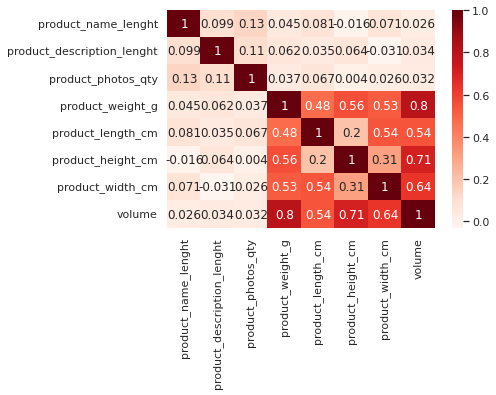

In [ ]:
plt.figure(figsize=(6,4))
c = products.corr()
sns.heatmap(c,cmap="Reds",annot=True)

Text(0, 0.5, 'Number of Products')

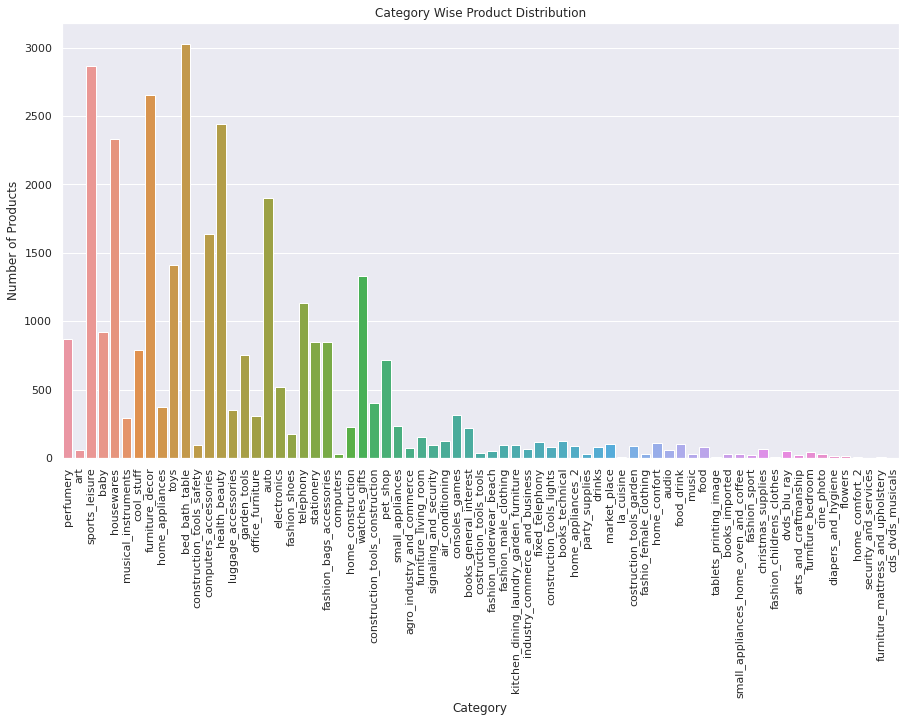

In [ ]:
# plotting the category wise distribution of products
plt.figure(figsize=(15,8))
chart = sns.countplot(x=products['product_category_name_english'], data=products)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Category Wise Product Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Products')

In [ ]:
products.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,volume
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,10800.0
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,2430.0
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,2704.0
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,4420.0


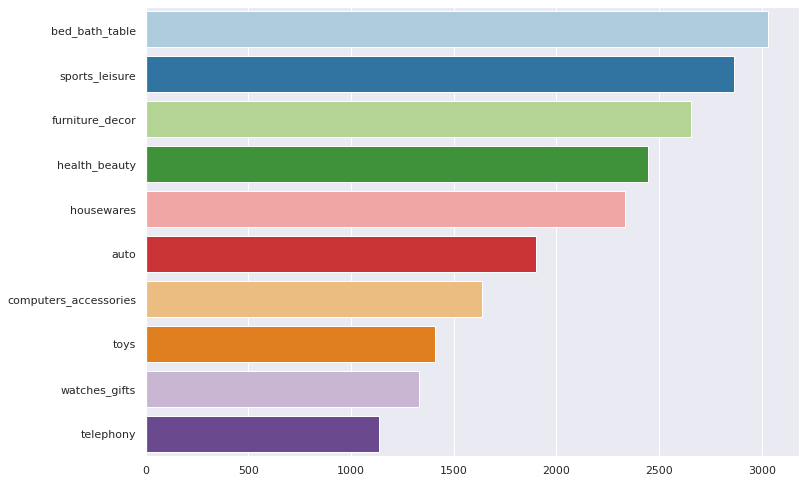

In [ ]:
# top 10 product category
sns.barplot(x=products['product_category_name_english'].value_counts().values[:10], y=products['product_category_name_english'].value_counts().index[:10], palette='Paired', orient = 'h');

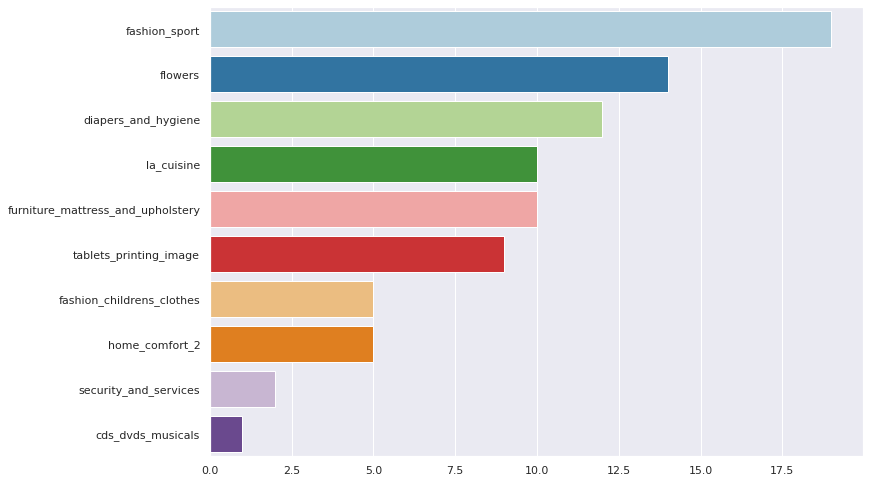

In [ ]:
# lowest 10 product category
sns.barplot(x=products['product_category_name_english'].value_counts().values[-10:], y=products['product_category_name_english'].value_counts().index[-10:], palette='Paired', orient = 'h');

In [ ]:
products.duplicated().sum()

0

In [ ]:
products.isnull().sum()

product_id                         0
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
volume                             2
dtype: int64

In [ ]:
products.dropna(axis='rows', inplace=True)

In [ ]:
products.isnull().sum()

product_id                       0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
volume                           0
dtype: int64

In [ ]:
print('The Number of Product Category: ', products['product_category_name_english'].nunique(), '\n')

print('Top 10 categoy by the number of product:')
products['product_category_name_english'].value_counts().head(10)

The Number of Product Category:  71 

Top 10 categoy by the number of product:


bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_category_name_english, dtype: int64

In [ ]:
print('The Number of Product Category: ', products['product_category_name_english'].nunique(), '\n')

print('Last 10 categoy by the number of product:')
products['product_category_name_english'].value_counts().tail(10)

The Number of Product Category:  71 

Last 10 categoy by the number of product:


fashion_sport                        19
flowers                              14
diapers_and_hygiene                  12
la_cuisine                           10
furniture_mattress_and_upholstery    10
tablets_printing_image                9
fashion_childrens_clothes             5
home_comfort_2                        5
security_and_services                 2
cds_dvds_musicals                     1
Name: product_category_name_english, dtype: int64

In [ ]:
#Merge data
total_orders = pd.merge(orders, order_items)
product_orders = pd.merge(total_orders,products, on="product_id")
product_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111022 entries, 0 to 111021
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111022 non-null  object        
 1   customer_id                    111022 non-null  object        
 2   order_status                   111022 non-null  object        
 3   order_purchase_timestamp       111022 non-null  datetime64[ns]
 4   order_approved_at              111008 non-null  datetime64[ns]
 5   order_delivered_carrier_date   109867 non-null  datetime64[ns]
 6   order_delivered_customer_date  108636 non-null  datetime64[ns]
 7   order_estimated_delivery_date  111022 non-null  datetime64[ns]
 8   order_item_id                  111022 non-null  int64         
 9   product_id                     111022 non-null  object        
 10  seller_id                      111022 non-null  object        
 11  

In [ ]:
product_orders['product_id_s']=product_orders['product_id'].str[-8:]

Text(0.5, 1.0, 'Top 10 Products')

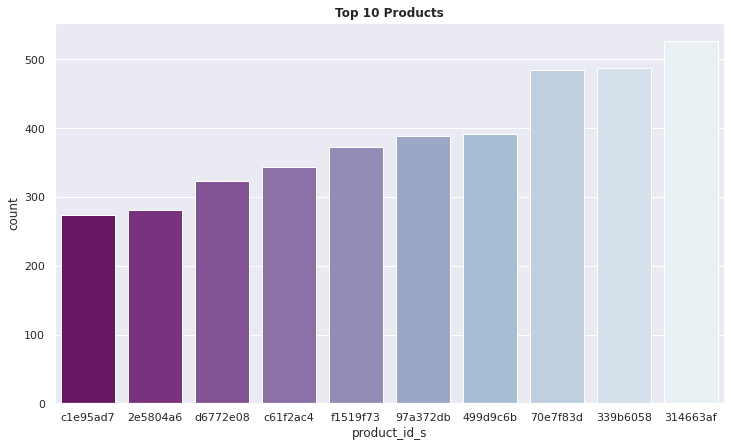

In [ ]:
#Plotting Top 10 Products
plt.figure(figsize=(12,7))
sns.countplot(x='product_id_s', data=product_orders, palette='BuPu_r',
             order=product_orders['product_id_s'].value_counts()[:10]\
             .sort_values().index).set_title("Top 10 Products", fontsize=12,
                                             weight='bold')

Text(0.5, 1.0, 'Lowest Sold 10 Products')

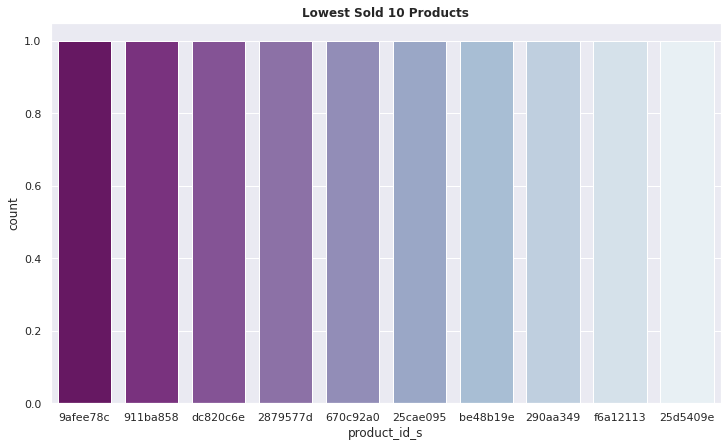

In [ ]:
#Plotting Lowest 10 Products
plt.figure(figsize=(12,7))
sns.countplot(x='product_id_s', data=product_orders, palette='BuPu_r',
             order=product_orders['product_id_s'].value_counts()[-10:]\
             .sort_values().index).set_title("Lowest Sold 10 Products", fontsize=12,
                                             weight='bold')

In [ ]:
group_category= product_orders.groupby(['product_id_s','product_category_name_english',])['product_id_s']\
.count().sort_values(ascending=False).head(10)
group_category

product_id_s  product_category_name_english
314663af      furniture_decor                  527
339b6058      bed_bath_table                   488
70e7f83d      garden_tools                     484
499d9c6b      garden_tools                     392
97a372db      garden_tools                     388
f1519f73      garden_tools                     373
c61f2ac4      computers_accessories            343
d6772e08      watches_gifts                    323
2e5804a6      health_beauty                    281
c1e95ad7      computers_accessories            274
Name: product_id_s, dtype: int64

In [ ]:
# merge sellers and product_orders tables
seller_products = pd.merge(product_orders, sellers, on="seller_id")
seller_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111022 entries, 0 to 111021
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111022 non-null  object        
 1   customer_id                    111022 non-null  object        
 2   order_status                   111022 non-null  object        
 3   order_purchase_timestamp       111022 non-null  datetime64[ns]
 4   order_approved_at              111008 non-null  datetime64[ns]
 5   order_delivered_carrier_date   109867 non-null  datetime64[ns]
 6   order_delivered_customer_date  108636 non-null  datetime64[ns]
 7   order_estimated_delivery_date  111022 non-null  datetime64[ns]
 8   order_item_id                  111022 non-null  int64         
 9   product_id                     111022 non-null  object        
 10  seller_id                      111022 non-null  object        
 11  

In [ ]:
# create a new column to shorten  seller id
seller_products['seller_id_s']=seller_products['seller_id'].str[-6:]

In [ ]:
seller_category= seller_products.groupby(['seller_id_s', 'product_category_name_english'])\
                        ['seller_id_s'].count().sort_values(ascending=False).head(10)
seller_category

seller_id_s  product_category_name_english
523100       garden_tools                     1882
7e94c0       watches_gifts                    1628
493884       bed_bath_table                   1572
0e0bfa       furniture_decor                  1292
dab84a       bed_bath_table                   1277
b010ab       office_furniture                 1233
f13abc       telephony                        1178
b7556a       health_beauty                    1091
3ad736       cool_stuff                       1069
3b52b2       watches_gifts                    1002
Name: seller_id_s, dtype: int64

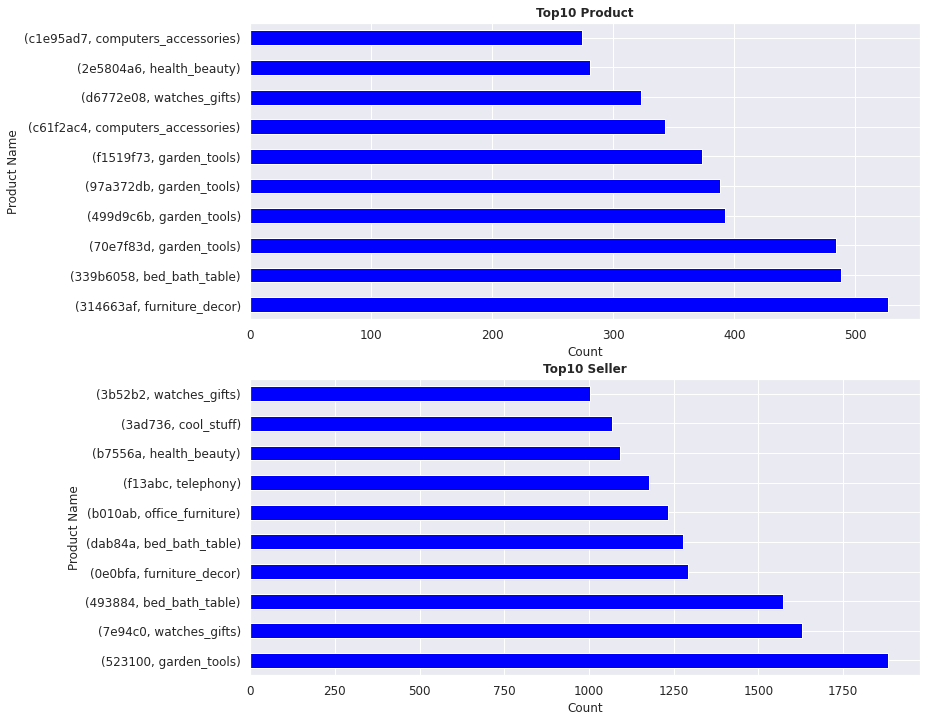

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))
group_category.plot.barh(ax=ax1, cmap='winter')
seller_category.plot.barh(ax=ax2, cmap='winter')

ax1.set_title('Top10 Product', fontweight='bold')
ax2.set_title('Top10 Seller', fontweight='bold')

ax1.set_xlabel('Count', fontsize=12)
ax1.set_ylabel('Product Name', fontsize=12)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)

ax2.set_xlabel('Count', fontsize=12)
ax2.set_ylabel('Product Name', fontsize=12)
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)

In [ ]:
# calculate total number of sold units by product categorie, merge 2 df(s): order_item + product
quantity_sale_product= pd.merge(order_items[['order_item_id','product_id','price','order_id']],
                           products[['product_id','product_category_name_english']], on='product_id')
quantity_sale_product['sale']= quantity_sale_product['order_item_id']*quantity_sale_product['price']

In [ ]:
# Total number of Sale by products
order_product= quantity_sale_product.groupby(by='product_category_name_english')['order_id'].nunique()
order_product= pd.DataFrame(order_product).sort_values('order_id', ascending=False).rename(columns={'order_id':'num of order'})

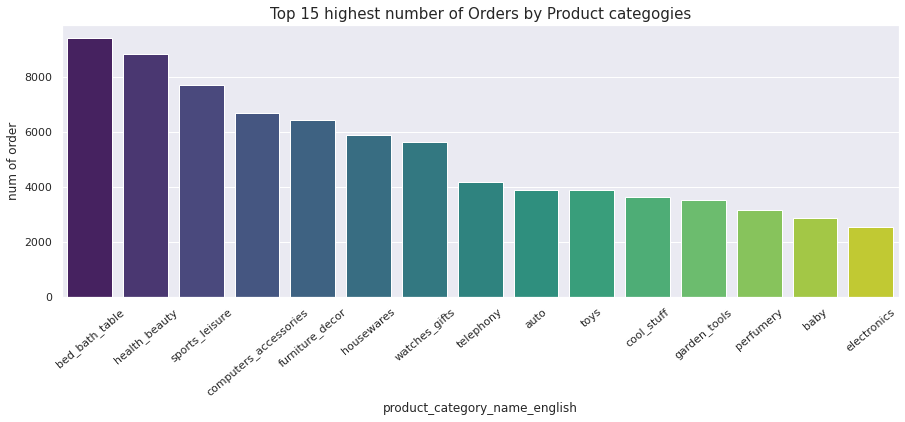

In [ ]:
# Visualization for Num of orders by product categories 
fig, ax= plt.subplots(figsize=(15,5))
sns.barplot(x='product_category_name_english',y='num of order', data=order_product.reset_index().head(15),
            palette='viridis',ax=ax)
ax.set_title('Top 15 highest number of Orders by Product categogies', fontsize=15)
plt.xticks(rotation = 40);

## geolocation table

In [ ]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
geolocation['geolocation_zip_code_prefix'].value_counts().to_frame().describe()

,geolocation_zip_code_prefix
count,19015.000000
mean,52.598633
std,72.057907
min,1.000000
25%,10.000000
50%,29.000000
75%,66.500000
max,1146.000000


In [ ]:
geolocation.shape

(1000163, 5)

In [ ]:
geolocation.geolocation_state.value_counts()

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64

In [ ]:
top_15 = geolocation[['geolocation_city','geolocation_lat','geolocation_lng']]
y= top_15['geolocation_city'].str.strip().value_counts().head(15)
#converting it in a list
list1=y.index.to_list()
list1

['sao paulo',
 'rio de janeiro',
 'belo horizonte',
 'são paulo',
 'curitiba',
 'porto alegre',
 'salvador',
 'guarulhos',
 'brasilia',
 'sao bernardo do campo',
 'osasco',
 'santo andre',
 'niteroi',
 'recife',
 'goiania']

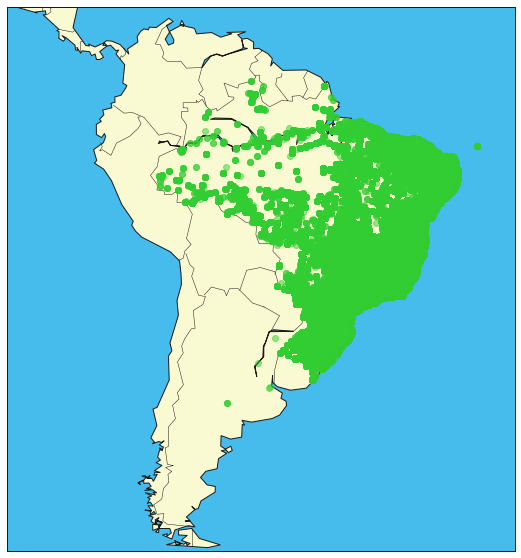

In [ ]:
# map of geolocation data
lat = geolocation['geolocation_lat']
lon = geolocation['geolocation_lng']

plt.figure(figsize=(10,10))

m = Basemap(llcrnrlat=-55.401805,llcrnrlon=-92.269176,urcrnrlat=13.884615,urcrnrlon=-27.581676)
m.bluemarble()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='lightgoldenrodyellow',lake_color='#46bcec') 
m.drawcoastlines()
m.drawcountries()
m.scatter(lon, lat,zorder=10,alpha=0.5,color='limegreen')

## category table

In [ ]:
category_name_tr.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
category_name_tr.shape

(71, 2)

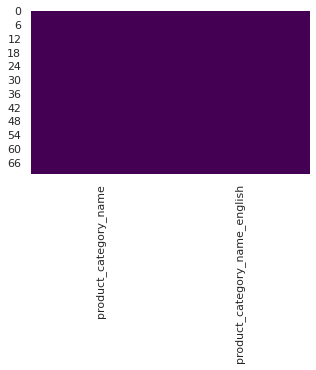

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(category_name_tr.isnull(), cbar=False, cmap='viridis')

In [ ]:
category_name_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
category_name_tr.duplicated().sum()

0

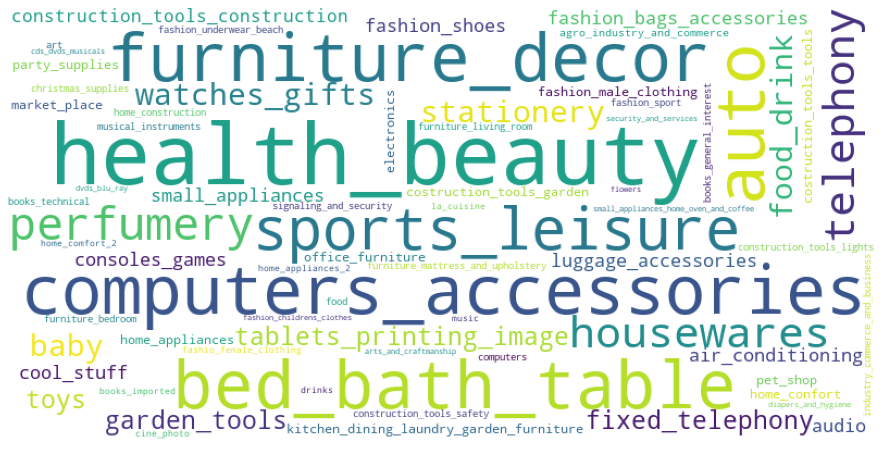

In [ ]:
words = ' '.join((i for i in category_name_tr.product_category_name_english.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud( width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);

## orders table

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [ ]:
orders.shape

(99441, 8)

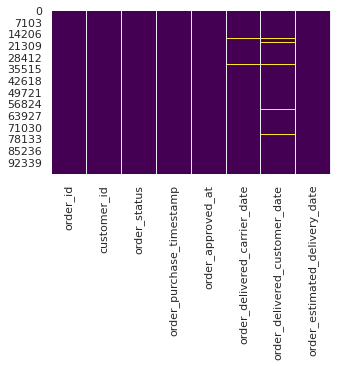

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(orders.isnull(), cbar=False, cmap='viridis')

In [ ]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
orders.isnull().sum() * 100 / len(orders)

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

In [ ]:
print("Total number of orders in the database:",orders['order_id'].nunique())

Total number of orders in the database: 99441


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
orders.duplicated().sum()

0

In [ ]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [ ]:
status_chart = orders.order_status.value_counts()
status_chart

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

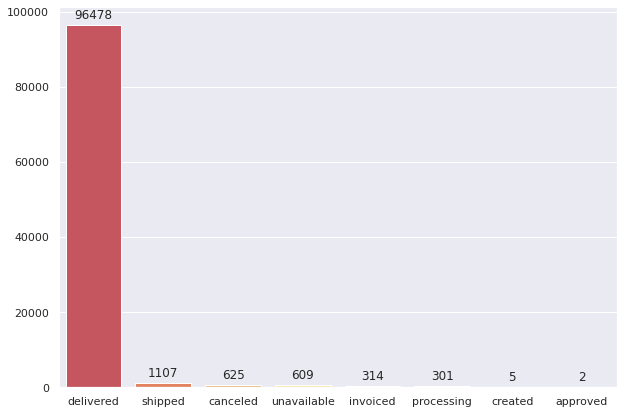

In [ ]:
# bar plot number of order status of products
plt.figure(figsize=(10, 7))
splot = sns.barplot(x=orders['order_status'].value_counts().index, y=orders['order_status'].value_counts().values, palette='Spectral', orient = 'vertical');
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
all_count = orders.order_status.value_counts().sum()
status = orders.order_status.value_counts().to_frame()
status['Percentage'] = round((orders.order_status.value_counts() / all_count) *100,3)

In [ ]:
# percentage of order status values with pie chart
fig = px.pie(status,
             values='Percentage',
             names=status.index,
             color_discrete_sequence=px.colors.sequential.Rainbow,
             title='Order status',
             hover_data=['order_status'])
fig.update_traces( textinfo='percent+label')
fig.update_layout(height=500,width=700)

fig.show()

In [ ]:
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].fillna(pd.Series(np.where(orders['order_status'] == 'delivered', orders['order_estimated_delivery_date'], orders['order_delivered_customer_date'])))

In [ ]:
orders['order_approved_at'].median()

Timestamp('2018-01-19 11:36:13')

In [ ]:
mean_approved = (orders['order_approved_at'] - orders['order_purchase_timestamp']).mean()
mean_approved

Timedelta('0 days 10:25:08.739486910')

In [ ]:
orders['order_approved_at'] = orders['order_approved_at'].fillna(orders['order_purchase_timestamp'] + mean_approved)

In [ ]:
mean_carrier = (orders['order_delivered_carrier_date'] - orders['order_approved_at']).mean()
mean_carrier

Timedelta('2 days 19:19:33.954644239')

In [ ]:
orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].fillna(orders['order_approved_at'] + mean_carrier)

In [ ]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    2957
order_estimated_delivery_date       0
dtype: int64

In [ ]:
# check the earliest and latest timestamp for the dataset orders
min_ts, max_ts = orders['order_purchase_timestamp'].min(), orders['order_purchase_timestamp'].max()
min_ts, max_ts, max_ts - min_ts

(Timestamp('2016-09-04 21:15:19'),
 Timestamp('2018-10-17 17:30:18'),
 Timedelta('772 days 20:14:59'))

In [ ]:
late_orders = orders[(orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']) < '0']
late_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12
35,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02


In [ ]:
late_orders['delay_time'] = late_orders['order_delivered_customer_date']-late_orders['order_estimated_delivery_date']

In [ ]:
late_review = pd.merge(late_orders, reviews, on='order_id', how='inner')
late_review.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_time,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,11 days 22:23:46,38cae21b1b57a95959440380d5b2ef7a,2,os correios estäo em greve... näo recebi nenhu...,2017-10-01 00:00:00,2017-10-01 17:55:21
1,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,9 days 22:03:54,6a1a8e54de03ab98e6e8ff56e56e507f,2,Demora muito entregar. Já passou o prazo e ain...,2018-03-16 00:00:00,2018-03-20 23:10:58
2,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,0 days 00:59:25,f121467a10eee0929f364c7d62abc9b5,5,há muito tempo efetuo compras atraves desta lo...,2018-03-20 00:00:00,2018-03-23 22:56:05
3,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,7 days 18:59:23,5caca29ffffe9086162ca51303817420,1,"Inicialmente, na data da compra o produto era ...",2017-12-22 00:00:00,2017-12-28 11:25:32
4,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,1 days 13:28:46,4ff7c437ae60fa0b3c700ade55155027,1,"Pedir 2 capinhas,estou pagando as duas e só ve...",2018-04-04 00:00:00,2018-04-04 09:31:50


In [ ]:
late_review[late_review['delay_time']<'1 days']['review_score'].mean()

4.033307513555384

In [ ]:
late_review[late_review['delay_time']<'5 days']['review_score'].mean()

3.460658482142857

In [ ]:
late_review[late_review['delay_time']>'5 days']['review_score'].mean()

1.7881952878309448

In [ ]:
late_review[late_review['delay_time']>'10 days']['review_score'].mean()

1.700489541611037

In [ ]:
late_review[late_review['delay_time']>'20 days']['review_score'].mean()

1.7570093457943925

In [ ]:
# Getting values for purchase date, year and Month
orders['order_purchase_year'] = orders['order_purchase_timestamp'].apply(lambda x: x.year)
orders['order_purchase_month'] = orders['order_purchase_timestamp'].apply(lambda x: x.month)
orders['order_purchase_month_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
orders['order_purchase_year_month'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y.%m'))
orders['order_purchase_date'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y-%m-%d'))

# Getting values for purchase day, day of the week and day_name
orders['order_purchase_day'] = orders['order_purchase_timestamp'].apply(lambda x: x.day)
orders['order_purchase_dayofweek'] = orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
orders['order_purchase_dayofweek_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Getting values for specific time of a day 
orders['order_purchase_hour'] = orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Early morning', 'Morning', 'Afternoon', 'Night']
orders['order_purchase_time_day'] = pd.cut(orders['order_purchase_hour'], hours_bins, labels=hours_labels)
orders[:5]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,2017.10,2017-10-02,2,0,Mon,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Jul,2018.07,2018-07-24,24,1,Tue,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Aug,2018.08,2018-08-08,8,2,Wed,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Nov,2017.11,2017-11-18,18,5,Sat,19,Night
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Feb,2018.02,2018-02-13,13,1,Tue,21,Night


In [ ]:
orders_customers = pd.merge(customers, orders, on='customer_id', how='inner')
o_c_o = pd.merge(order_items, orders_customers, on='order_id', how='inner')
o_c_o_s = pd.merge(sellers, o_c_o, on='seller_id', how='inner')
o_c_o_s  # merged orders, customers, order_items and sellers tables

,seller_id,seller_city,seller_state,order_id,order_item_id,product_id,price,freight_value,revenue,more_than_one_item_order,...,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,106.20,9.56,106.20,False,...,2017,8,Aug,2017.08,2017-08-21,21,0,Mon,20,Night
1,3442f8959a84dea7ee197c632cb2df15,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,101.70,15.92,101.70,False,...,2017,5,May,2017.05,2017-05-05,5,4,Fri,16,Afternoon
2,3442f8959a84dea7ee197c632cb2df15,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,10.80,2.42,21.60,True,...,2017,8,Aug,2017.08,2017-08-30,30,2,Wed,11,Morning
3,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,89.99,45.09,89.99,False,...,2017,11,Nov,2017.11,2017-11-10,10,4,Fri,16,Afternoon
4,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,199.90,21.89,199.90,False,...,2017,9,Sep,2017.09,2017-09-28,28,3,Thu,19,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,7aa50aad959e4345b45b9732bc346a6e,1,e891d4a9622cae3b9fc2ec558bda155b,27.00,16.05,27.00,False,...,2017,3,Mar,2017.03,2017-03-01,1,2,Wed,2,Early morning
112646,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,aae373a2cc64ed2d1f262aa56e70b7e8,1,e891d4a9622cae3b9fc2ec558bda155b,27.00,10.96,27.00,False,...,2017,2,Feb,2017.02,2017-02-09,9,3,Thu,16,Afternoon
112647,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,bc34d5b185152cb88b9f5db391dcd1cb,1,e891d4a9622cae3b9fc2ec558bda155b,27.00,16.05,27.00,False,...,2017,4,Apr,2017.04,2017-04-03,3,0,Mon,17,Afternoon
112648,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,d1edb80f6670902ebbb11765b96873da,1,e891d4a9622cae3b9fc2ec558bda155b,27.00,12.48,27.00,False,...,2017,6,Jun,2017.06,2017-06-16,16,4,Fri,17,Afternoon


In [ ]:
o_c_o_s.columns

Index(['seller_id', 'seller_city', 'seller_state', 'order_id', 'order_item_id',
       'product_id', 'price', 'freight_value', 'revenue',
       'more_than_one_item_order', 'customer_id', 'customer_unique_id',
       'customer_city', 'customer_state', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_purchase_year',
       'order_purchase_month', 'order_purchase_month_name',
       'order_purchase_year_month', 'order_purchase_date',
       'order_purchase_day', 'order_purchase_dayofweek',
       'order_purchase_dayofweek_name', 'order_purchase_hour',
       'order_purchase_time_day'],
      dtype='object')

In [ ]:
# yearly growth of revenue 2017-2017:
products_M=o_c_o_s[o_c_o_s['order_purchase_year'].isin([2017,2018])]
products_M=products_M[products_M['order_purchase_month']<=9]
products_M['revenue($R1000)']=products_M['price']/1000
products_M=products_M.pivot_table(values='revenue($R1000)', columns='order_purchase_year', aggfunc ='sum')
products_M.reset_index(inplace=True)
products_M['%Growth']=(products_M[2018]/products_M[2017]-1)*100
products_M.columns.names = ['']
products_M.index.names = ['']
product_M_style = products_M.style.applymap(lambda x: 'color:darkblue;background-color:pink' if x==products_M.iloc[0,2] else '')
product_M_style

,index,2017,2018,%Growth
,,,,
0,revenue($R1000),3737.402010,7386.050800,97.625270


In [ ]:
delivery_time = (orders['order_delivered_customer_date'].dt.date - orders['order_purchase_timestamp'].dt.date).value_counts().rename('Count')
delivery_time_df = delivery_time.to_frame().reset_index()

In [ ]:
delivery_time_df

,index,Count
0,7 days,7482
1,8 days,7123
2,6 days,6507
3,9 days,6256
4,10 days,5793
...,...,...
139,194 days,1
140,119 days,1
141,138 days,1
142,145 days,1


In [ ]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,2017.10,2017-10-02,2,0,Mon,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Jul,2018.07,2018-07-24,24,1,Tue,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Aug,2018.08,2018-08-08,8,2,Wed,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Nov,2017.11,2017-11-18,18,5,Sat,19,Night
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Feb,2018.02,2018-02-13,13,1,Tue,21,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017,3,Mar,2017.03,2017-03-09,9,3,Thu,9,Morning
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018,2,Feb,2018.02,2018-02-06,6,1,Tue,12,Morning
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017,8,Aug,2017.08,2017-08-27,27,6,Sun,14,Afternoon
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018,1,Jan,2018.01,2018-01-08,8,0,Mon,21,Night


In [ ]:
# delivery times and counts to customers
delivery_time_df = delivery_time_df[:30]
fig=px.bar(delivery_time_df,y=delivery_time_df['index'].dt.days,x='Count',orientation='h')
fig.update_yaxes(dtick=1)
fig.update_layout(title="Delivery Days", yaxis_title="Number of month day on which order got delivered", xaxis_title="Number of orders on that day", font=dict(family="Helvetica", size=12, color="#2F4F4F")                )
fig.show()

In [ ]:
orders = orders.sort_values('order_purchase_date',axis=0)

In [ ]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
px.scatter(orders,x='order_purchase_year_month',y='order_purchase_day')

In [ ]:
graph1 = orders['order_purchase_timestamp'].dt.day_name().value_counts()
graph2 = orders['order_approved_at'].dt.day_name().value_counts()
graph3 = orders['order_delivered_customer_date'].dt.day_name().value_counts()
graph4 = orders['order_estimated_delivery_date'].dt.day_name().value_counts()
#plotting all subplots 
f1 = px.bar(x=graph1.index,y=graph1.values)
f2= px.bar(x=graph2.index,y=graph2.values)
f3= px.bar(x=graph3.index,y=graph3.values)
f4= px.bar(x=graph4.index,y=graph4.values)

In [ ]:
#getting the traces out of it
trace1 = f1['data'][0]
trace2 = f2['data'][0]
trace3 = f3['data'][0]
trace4 = f4['data'][0]

In [ ]:
#making a subplot having two rows and two columns
fig = make_subplots(rows = 2, cols =2 , shared_xaxes = False,subplot_titles=("Order Purchase ", "Order Delivery ", "Order Approved ", "Order Estimated Delivery "))

In [ ]:
#adding traces in the figure
fig.add_trace(trace1, row = 1, col = 1)
fig.add_trace(trace2, row = 2, col = 1)
fig.add_trace(trace3, row = 1, col = 2)
fig.add_trace(trace4, row = 2, col = 2)
fig.update_layout(height=800, width=800, title_text="Stacked Subplots",plot_bgcolor='#F5FFFA')

fig.update_xaxes(title_text="Days")
fig.update_yaxes(title_text='Count')

fig.show()

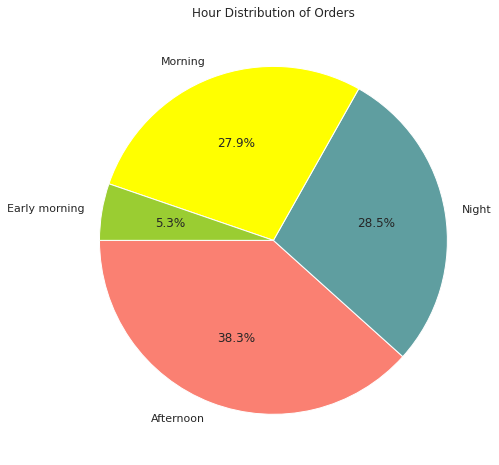

In [ ]:
# order numbers percentages for date times
hours_count = orders.order_purchase_time_day.value_counts()
plt.figure(figsize=(8,8))
plt.title('Hour Distribution of Orders')
colors=['salmon', 'cadetblue', 'yellow', 'yellowgreen']
plt.pie(hours_count, labels=hours_count.index, autopct='%1.1f%%', startangle=180, colors=colors);

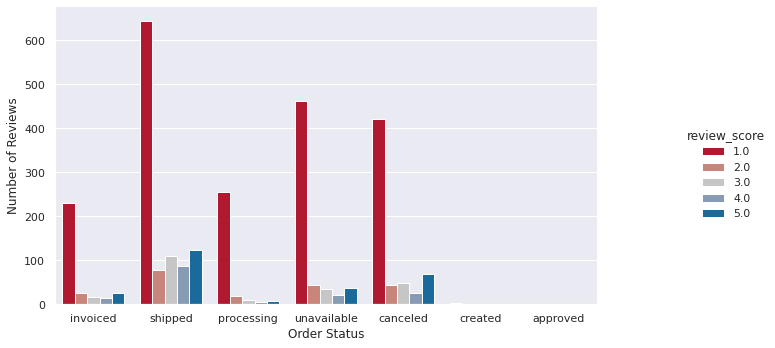

In [ ]:
# effect of order status on review score
COLOR_5S = '#0571b0'
COLOR_1S = '#ca0020'
REVIEWS_PALETTE = sns.color_palette((COLOR_1S, '#d57b6f', '#c6c6c6',
'#7f9abc', COLOR_5S))
resize_plot = lambda: plt.gcf().set_size_inches(12, 5)
order_review.groupby('order_status')['order_status'].count()
ax = sns.catplot(
 x='order_status',
 kind='count',
 hue='review_score',
 data=order_review[order_review['order_status'] != 'delivered'],
 palette=REVIEWS_PALETTE).set(xlabel='Order Status', ylabel='Number of Reviews');
resize_plot()

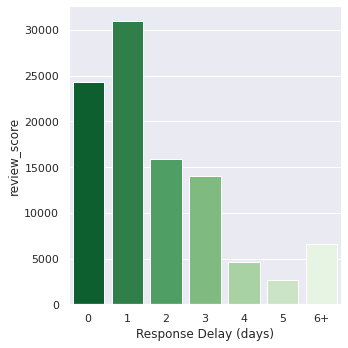

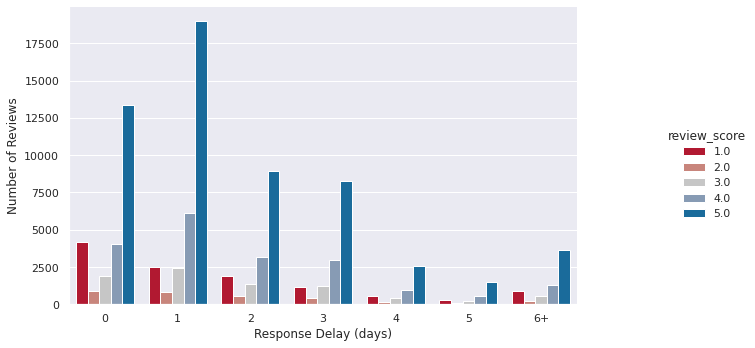

In [ ]:
# customer response day to distribution review e-mail
# effect of response day to review score
order_review['review_answer_timestamp'] = pd.to_datetime(order_review['review_answer_timestamp'])
order_review['review_creation_date'] = pd.to_datetime(order_review['review_creation_date'])
order_review['delay'] = (order_review['review_answer_timestamp'] - order_review['review_creation_date']).dt.days
bins = [-1, 0, 1, 2, 3, 4, 5, 99999]
labels = ['0', '1', '2', '3', '4', '5', '6+']
order_review['delay_group'] = pd.cut(order_review['delay'], bins,
labels=labels)
sns.catplot(
 x='delay_group',
 kind='count',
 data=order_review,
 palette=sns.color_palette('Greens_r', n_colors=7)
).set(xlabel='Response Delay (days)', ylabel='review_score');
sns.catplot(
 x='delay_group',
 kind='count',
 hue='review_score',
 data=order_review,
 palette=REVIEWS_PALETTE
).set(xlabel='Response Delay (days)', ylabel='Number of Reviews');
resize_plot()


In [ ]:
order_time= orders[['order_id','order_purchase_timestamp']]
order_time['order_purchase_timestamp']= pd.to_datetime(order_time['order_purchase_timestamp']).dt.date
order_time.sort_values('order_purchase_timestamp', inplace=True)

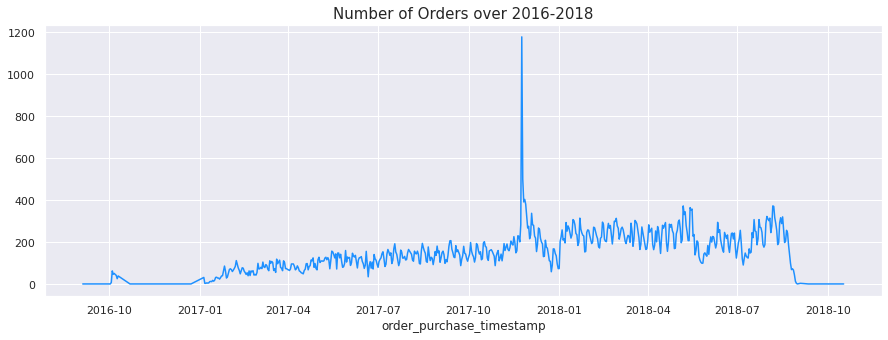

In [ ]:
# order distributions for 2 years
fig, ax= plt.subplots()
ax=order_time.groupby('order_purchase_timestamp')['order_id'].count().plot(figsize=(15,5), color='dodgerblue')
ax.set_title('Number of Orders over 2016-2018', fontsize=15);

## payments table

In [ ]:
order_payments.head()

,order_id,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2,128.45


In [ ]:
order_payments.drop ('payment_sequential', axis=1, inplace=True)

In [ ]:
order_payments.duplicated().sum()

614

In [ ]:
order_payments.drop_duplicates(inplace=True)

In [ ]:
order_payments.shape

(103272, 4)

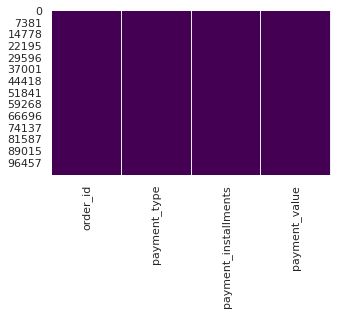

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(order_payments.isnull(), cbar=False, cmap='viridis')

In [ ]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103272 entries, 0 to 103885
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103272 non-null  object 
 1   payment_type          103272 non-null  object 
 2   payment_installments  103272 non-null  int64  
 3   payment_value         103272 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.9+ MB


In [ ]:
order_payments['payment_installments'].describe()

count    103272.000000
mean          2.864029
std           2.691071
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

In [ ]:
top_payment_types = (order_payments['payment_type'].value_counts()).to_frame()

In [ ]:
top_payment_types

,payment_type
credit_card,76783
boleto,19784
voucher,5173
debit_card,1529
not_defined,3


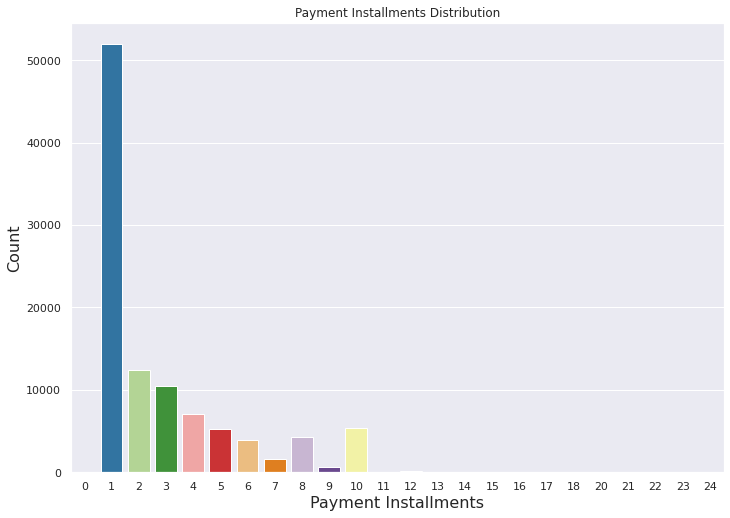

In [ ]:
# bar chart of payment installments
sns.barplot(x=order_payments['payment_installments'].value_counts().index, y=order_payments['payment_installments'].value_counts().values, palette='Paired');

plt.title('Payment Installments Distribution');
plt.xlabel('Payment Installments', fontsize=16);
plt.ylabel('Count', fontsize=16);

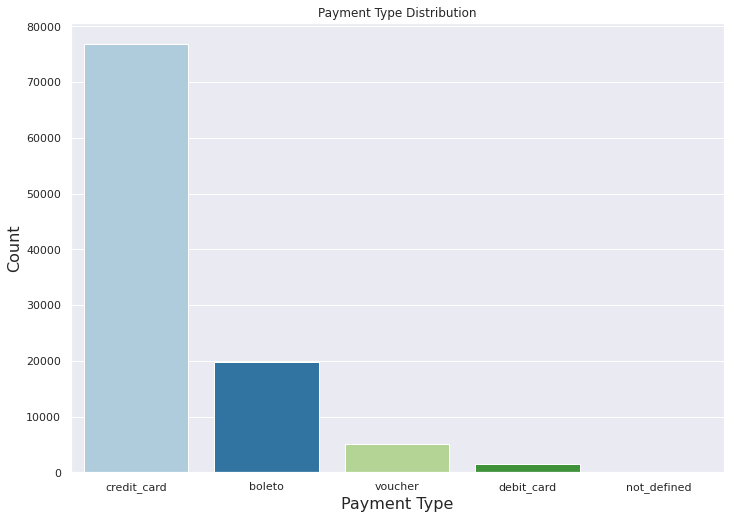

In [ ]:
sns.barplot(x=order_payments['payment_type'].value_counts().index, y=order_payments['payment_type'].value_counts().values, palette='Paired');

plt.title('Payment Type Distribution');
plt.xlabel('Payment Type', fontsize=16);
plt.ylabel('Count', fontsize=16);

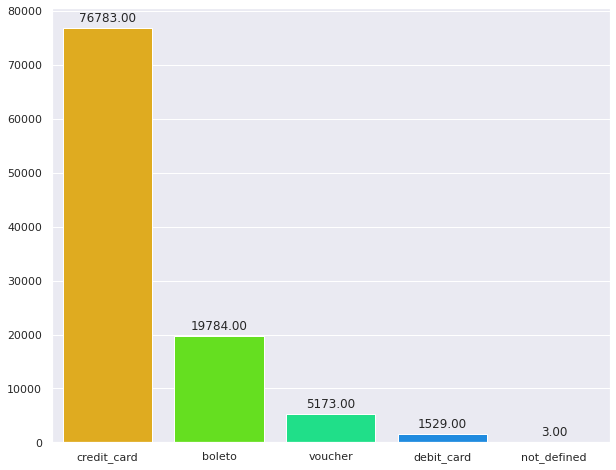

In [ ]:
# count of order method usages
plt.figure(figsize=(10, 8))
splot = sns.barplot(x = order_payments['payment_type'].value_counts().index, y = order_payments['payment_type'].value_counts().values, palette='gist_rainbow')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
orders_items = pd.merge(order_items, orders, on='order_id', how='inner')
orders_items

,order_id,order_item_id,product_id,seller_id,price,freight_value,revenue,more_than_one_item_order,customer_id,order_status,...,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,58.90,False,3ce436f183e68e07877b285a838db11a,delivered,...,2017,9,Sep,2017.09,2017-09-13,13,2,Wed,8,Morning
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,239.90,False,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,2017,4,Apr,2017.04,2017-04-26,26,2,Wed,10,Morning
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,199.00,False,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,2018,1,Jan,2018.01,2018-01-14,14,6,Sun,14,Afternoon
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,12.99,False,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,2018,8,Aug,2018.08,2018-08-08,8,2,Wed,10,Morning
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,199.90,False,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,2017,2,Feb,2017.02,2017-02-04,4,5,Sat,13,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,299.99,False,b51593916b4b8e0d6f66f2ae24f2673d,delivered,...,2018,4,Apr,2018.04,2018-04-23,23,0,Mon,13,Afternoon
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,350.00,False,84c5d4fbaf120aae381fad077416eaa0,delivered,...,2018,7,Jul,2018.07,2018-07-14,14,5,Sat,10,Morning
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,99.90,False,29309aa813182aaddc9b259e31b870e6,delivered,...,2017,10,Oct,2017.10,2017-10-23,23,0,Mon,17,Afternoon
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,55.99,False,b5e6afd5a41800fdf401e0272ca74655,delivered,...,2017,8,Aug,2017.08,2017-08-14,14,0,Mon,23,Night


In [ ]:
trend_weekday=pd.DataFrame(orders_items.groupby('order_purchase_dayofweek_name').agg({'price':'mean'}).rename(columns={'price':'Mean_Transaction'})).reset_index()

Text(0, 0.5, 'Value')

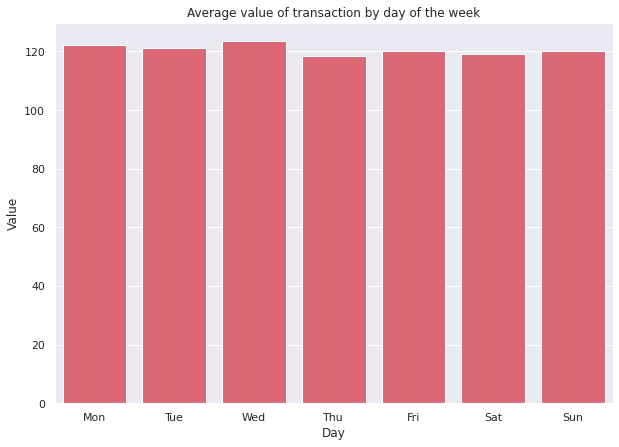

In [ ]:
x2 = trend_weekday.index.tolist()
y2 = trend_weekday.Mean_Transaction.tolist()

weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
x2 = [weekmap[x] for x in x2]
wkmp = {}
for j,x in enumerate(x2):
    wkmp[x] = y2[j]
order_week = list(weekmap.values())
ordervals = [wkmp[val] for val in order_week]

plt.figure(figsize=(10,7))
ax=sns.barplot(x=order_week,y=ordervals, color='#ed5569')
ax.set_title("Average value of transaction by day of the week")
ax.set_xlabel('Day')
ax.set_ylabel('Value')

In [ ]:
df = pd.merge(orders, order_items, on='order_id', how='outer')
df = pd.merge(df, order_payments, on='order_id', how='outer')
df = pd.merge(df, reviews, on='order_id', how='outer')
df = pd.merge(df, products, on='product_id', how='outer')
df = pd.merge(df, customers, on='customer_id', how='outer')
df = pd.merge(df, sellers, on='seller_id', how='outer')
df = pd.merge(df, category_name_tr, on='product_category_name_english',how='outer')

In [ ]:
# mean review scores per category
product_score = df.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False).to_frame()
fig = px.bar(product_score, y='review_score',hover_name=product_score.index)
fig.update_traces(marker=dict(color='sandybrown'))
fig.update_layout(height=500,width=700)
fig.show()

In [ ]:
# categories with most revenue
product_sale =df.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).to_frame()[:15]
fig = px.bar(product_sale, y='price',hover_name=product_sale.index)
fig.update_traces(marker=dict(color='yellowgreen'))
fig.update_layout(height=500,width=700)
fig.show()